<a href="https://colab.research.google.com/github/gleiciny/Layout/blob/main/Atividade_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 1.00
Matriz de Confusão:
[[80  0]
 [ 0 10]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        10

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



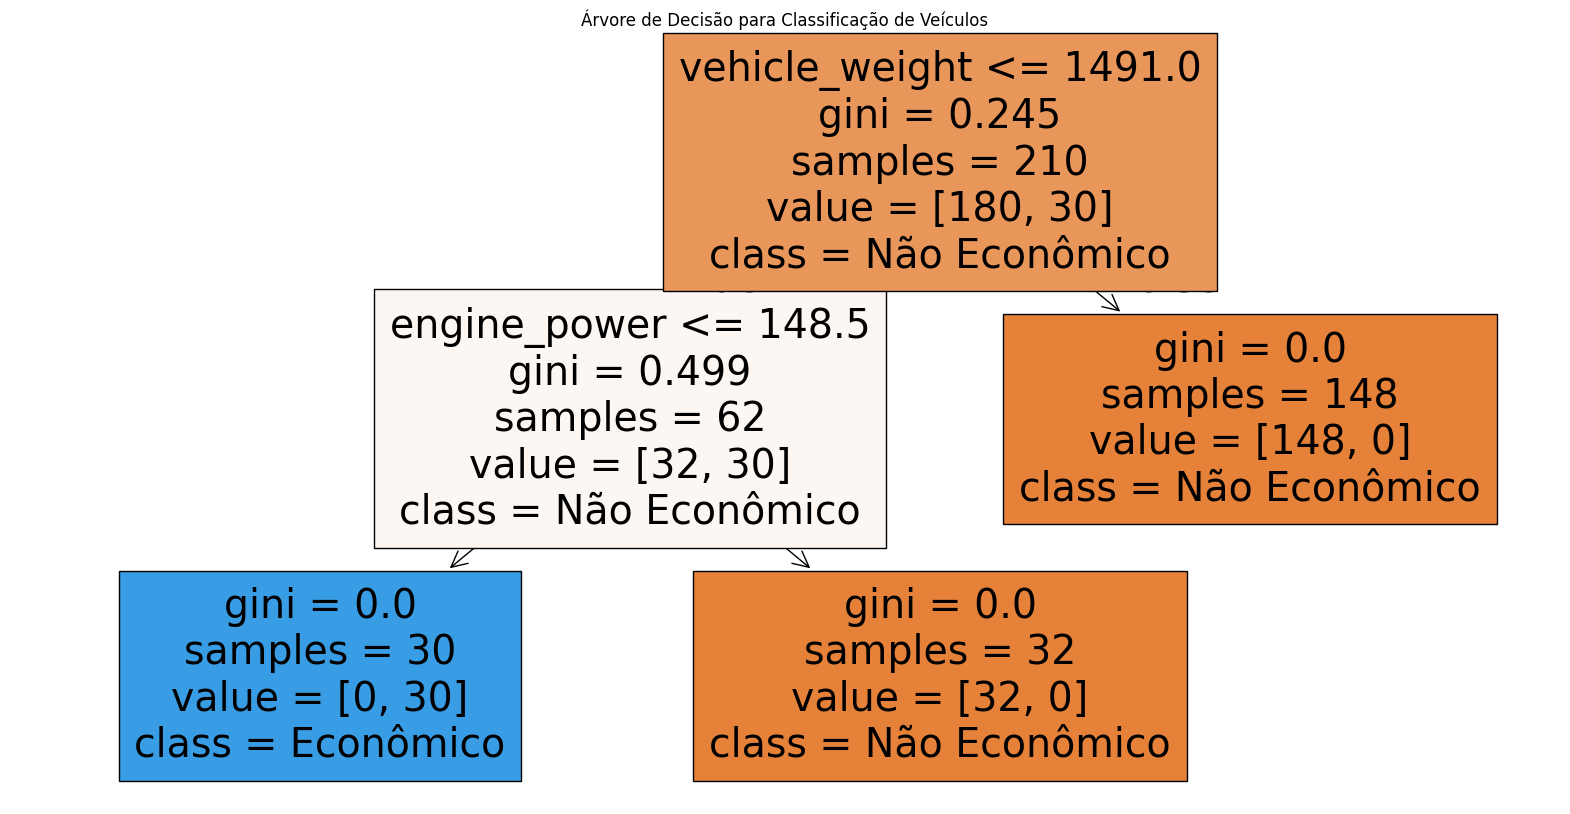

Regras da Árvore de Decisão:
|--- vehicle_weight <= 1491.00
|   |--- engine_power <= 148.50
|   |   |--- class: 1
|   |--- engine_power >  148.50
|   |   |--- class: 0
|--- vehicle_weight >  1491.00
|   |--- class: 0



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Gerando dados fictícios
np.random.seed(42)
num_vehicles = 300
engine_power = np.random.randint(50, 300, num_vehicles)
vehicle_weight = np.random.randint(800, 3000, num_vehicles)
is_economical = ((engine_power < 150) & (vehicle_weight < 1500)).astype(int)

# Criando um DataFrame
data = pd.DataFrame({
    'engine_power': engine_power,
    'vehicle_weight': vehicle_weight,
    'is_economical': is_economical
})

# Dividindo os dados em conjunto de treino e teste
X = data[['engine_power', 'vehicle_weight']]
y = data['is_economical']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

# Visualizando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=['engine_power', 'vehicle_weight'], class_names=['Não Econômico', 'Econômico'], filled=True)
plt.title('Árvore de Decisão para Classificação de Veículos')
plt.show()

# Visualizando as regras da árvore de decisão
tree_rules = export_text(model, feature_names=['engine_power', 'vehicle_weight'])
print('Regras da Árvore de Decisão:')
print(tree_rules)
